<a href="https://colab.research.google.com/github/tyty6365/AVLTree-Dendrologist/blob/master/YelpReview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# Install Java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# Download Spark 3.3.2 (works perfectly with Colab)
!wget -q https://archive.apache.org/dist/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz
!tar xf spark-3.3.2-bin-hadoop3.tgz

# Install Python Libraries
!pip install -q findspark pyspark elasticsearch transformers sentence-transformers

# Set Environment Variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.2-bin-hadoop3"

import findspark
findspark.init()

# Initialize Spark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("YelpBigDataProject").getOrCreate()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 895.8/895.8 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.6 MB/s eta 0:00:00


In [22]:
from google.colab import files
files.upload()  # Upload kaggle.json here

# Install Kaggle API
!pip install -q kaggle

# Setup Kaggle Credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download Yelp Dataset from Kaggle
!kaggle datasets download -d yelp-dataset/yelp-dataset

# Unzip dataset
!unzip yelp-dataset.zip


Saving kaggle.json to kaggle (4).json
Dataset URL: https://www.kaggle.com/datasets/yelp-dataset/yelp-dataset
License(s): other
Archive:  yelp-dataset.zip
  inflating: Dataset_User_Agreement.pdf  
  inflating: yelp_academic_dataset_business.json  
  inflating: yelp_academic_dataset_checkin.json  
  inflating: yelp_academic_dataset_review.json  
  inflating: yelp_academic_dataset_tip.json  
  inflating: yelp_academic_dataset_user.json  


In [23]:
# Check what files are in your Colab environment
!ls


 Dataset_User_Agreement.pdf   spark-3.3.2-bin-hadoop3.tgz
'kaggle (1).json'	      yelp_academic_dataset_business.json
'kaggle (2).json'	      yelp_academic_dataset_checkin.json
'kaggle (3).json'	      yelp_academic_dataset_review.json
'kaggle (4).json'	      yelp_academic_dataset_tip.json
 kaggle.json		      yelp_academic_dataset_user.json
 sample_data		      yelp-dataset.zip
 spark-3.3.2-bin-hadoop3


In [24]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Start Spark Session
spark = SparkSession.builder.appName("YelpBigDataProject").getOrCreate()

# Load Datasets
business_df = spark.read.json("yelp_academic_dataset_business.json")
review_df = spark.read.json("yelp_academic_dataset_review.json")

# Check the Schema of both
business_df.printSchema()
review_df.printSchema()


root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

In [25]:
clean_business_df = business_df.select(
    "business_id",
    "name",
    "stars",
    "review_count",
    "attributes.*",
    "categories",
    "state"
)


clean_business_df.show(5)


+--------------------+--------------------+-----+------------+----------------+-----------+-------+--------+----+-----------+----------+-----------+----------------------+--------------------------+--------------------+-----------------+------+---------+-------+-------------------+-----------+---------+--------------+-----------+-----------+-----------------+---------+-----+-----+----------+-----------+--------------+-----------------+-------------------------+-------------------+------------------------+----------------------+-----------------------+-----------------------+------------------+-------+--------------------+-------+--------------------+-----+
|         business_id|                name|stars|review_count|AcceptsInsurance|AgesAllowed|Alcohol|Ambience|BYOB|BYOBCorkage|BestNights|BikeParking|BusinessAcceptsBitcoin|BusinessAcceptsCreditCards|     BusinessParking|ByAppointmentOnly|Caters|CoatCheck|Corkage|DietaryRestrictions|DogsAllowed|DriveThru|GoodForDancing|GoodForKids|Good

In [26]:
clean_review_df = review_df.select(
    "business_id",
    "stars",
    "text"
)

clean_review_df.show(5)


+--------------------+-----+--------------------+
|         business_id|stars|                text|
+--------------------+-----+--------------------+
|XQfwVwDr-v0ZS3_Cb...|  3.0|If you decide to ...|
|7ATYjTIgM3jUlt4UM...|  5.0|I've taken a lot ...|
|YjUWPpI6HXG530lwP...|  3.0|Family diner. Had...|
|kxX2SOes4o-D3ZQBk...|  5.0|Wow!  Yummy, diff...|
|e4Vwtrqf-wpJfwesg...|  4.0|Cute interior and...|
+--------------------+-----+--------------------+
only showing top 5 rows



In [27]:
# Join Business & Review Data
combined_df = clean_business_df.join(
    clean_review_df,
    on="business_id",
    how="inner"
)

combined_df.show(5)


+--------------------+-----------------+-----+------------+----------------+-----------+-------+--------------------+----+-----------+----------+-----------+----------------------+--------------------------+--------------------+-----------------+------+---------+-------+-------------------+-----------+---------+--------------+-----------+-----------+-----------------+---------+-----+-----+----------+-----------+--------------+-----------------+-------------------------+-------------------+------------------------+----------------------+-----------------------+-----------------------+------------------+-------+--------------------+-----+--------------------+-----+-----+--------------------+
|         business_id|             name|stars|review_count|AcceptsInsurance|AgesAllowed|Alcohol|            Ambience|BYOB|BYOBCorkage|BestNights|BikeParking|BusinessAcceptsBitcoin|BusinessAcceptsCreditCards|     BusinessParking|ByAppointmentOnly|Caters|CoatCheck|Corkage|DietaryRestrictions|DogsAllowe

In [28]:
# Register DataFrames as Temporary Views
clean_business_df.createOrReplaceTempView("business")
clean_review_df.createOrReplaceTempView("review")


In [29]:
spark.sql("""
    SELECT state, AVG(stars) AS avg_rating
    FROM business
    GROUP BY state
    ORDER BY avg_rating DESC
""").show(10)


+-----+------------------+
|state|        avg_rating|
+-----+------------------+
|   MT|               5.0|
|   UT|               4.5|
|   VT|               4.5|
|   SD|               4.5|
|   HI|              4.25|
|   CO|               4.0|
|  XMS|               4.0|
|   CA|3.9967326542379396|
|   NV|3.7368762151652626|
|   ID|3.7076337586747257|
+-----+------------------+
only showing top 10 rows



In [30]:
spark.sql("""
    SELECT WiFi, COUNT(*) AS count
    FROM business
    GROUP BY WiFi
    ORDER BY count DESC
""").show()


+-------+-----+
|   WiFi|count|
+-------+-----+
|   NULL|93432|
|u'free'|27029|
|  u'no'|15221|
| 'free'| 7385|
|   'no'| 6610|
|u'paid'|  486|
| 'paid'|  133|
|   None|   50|
+-------+-----+



In [31]:
spark.sql("""
    SELECT WiFi, AVG(stars) AS avg_rating, COUNT(*) AS business_count
    FROM business
    GROUP BY WiFi
    ORDER BY avg_rating DESC
""").show()


+-------+------------------+--------------+
|   WiFi|        avg_rating|business_count|
+-------+------------------+--------------+
|u'free'| 3.771523178807947|         27029|
|  u'no'| 3.678864726364891|         15221|
|u'paid'|3.6316872427983538|           486|
|   NULL|3.5615474355681136|         93432|
|   'no'|3.4581694402420573|          6610|
|   None|              3.44|            50|
| 'paid'|3.3684210526315788|           133|
| 'free'| 3.359580230196344|          7385|
+-------+------------------+--------------+



In [32]:
spark.sql("""
    SELECT categories, AVG(stars) AS avg_rating, COUNT(*) AS total
    FROM business
    WHERE categories IS NOT NULL
    GROUP BY categories
    ORDER BY avg_rating DESC
    LIMIT 20
""").show(truncate=False)


+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------+-----+
|categories                                                                                                                                                                                     |avg_rating|total|
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------+-----+
|Tree Services, Home & Garden, Shopping, Landscaping, Home Services, Nurseries & Gardening, Irrigation                                                                                          |5.0       |1    |
|Building Supplies, Flooring, Kitchen & Bath, Home Services, Shopping, Home & Garden                                                                        

In [33]:
spark.sql("""
    SELECT review_count, AVG(stars) AS avg_rating
    FROM business
    GROUP BY review_count
    ORDER BY review_count DESC
""").show(20)


+------------+----------+
|review_count|avg_rating|
+------------+----------+
|        7568|       4.0|
|        7400|       4.0|
|        6093|       4.5|
|        5721|       4.5|
|        5193|       4.5|
|        5185|       3.5|
|        5070|       4.0|
|        4876|       4.5|
|        4554|       4.0|
|        4421|       4.0|
|        4250|       3.0|
|        4207|       4.0|
|        3999|       4.5|
|        3966|       4.0|
|        3902|       4.0|
|        3837|       4.5|
|        3834|       4.5|
|        3582|       4.5|
|        3401|       2.5|
|        3345|       3.0|
+------------+----------+
only showing top 20 rows



In [34]:
#selecting and preparing features to be in rows
ml_df = clean_business_df.select(
    "stars", "WiFi", "BusinessParking", "Alcohol", "NoiseLevel", "RestaurantsPriceRange2"
).dropna()

In [35]:
from pyspark.sql.functions import round as spark_round

#converts int to a star for the model
ml_df = ml_df.withColumn("stars", spark_round(col("stars")).cast("int"))

new_model = ml_df

In [36]:
from pyspark.ml.feature import StringIndexer

#indexes through features below

indx = [StringIndexer(inputCol=column, outputCol=column+"_index") for column in ["WiFi", "BusinessParking", "Alcohol", "NoiseLevel", "RestaurantsPriceRange2"]]


In [37]:
from pyspark.ml.feature import VectorAssembler

assem = VectorAssembler(inputCols=["WiFi_index", "BusinessParking_index", "Alcohol_index", "NoiseLevel_index", "RestaurantsPriceRange2_index"], outputCol="features")

In [38]:
from pyspark.sql.functions import col, round as spark_round
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

new_model = clean_business_df.select(
    "stars", "WiFi", "BusinessParking", "Alcohol", "NoiseLevel", "RestaurantsPriceRange2"
).dropna()

new_model = new_model.withColumn("stars", spark_round(col("stars")).cast("int"))
new_model = new_model.withColumn("stars", (col("stars") - 1).cast("int"))

new_model = new_model.filter((col("stars") >= 0) & (col("stars") <= 4))

indexers = [StringIndexer(inputCol=column, outputCol=column + "_index", handleInvalid="keep")
            for column in ["WiFi", "BusinessParking", "Alcohol", "NoiseLevel", "RestaurantsPriceRange2"]]

assembler = VectorAssembler(
    inputCols=[col + "_index" for col in ["WiFi", "BusinessParking", "Alcohol", "NoiseLevel", "RestaurantsPriceRange2"]],
    outputCol="features"
)

#randomizes the star rating
rfc = RandomForestClassifier(labelCol="stars", featuresCol="features", numTrees=50, maxBins=256)

pLine = Pipeline(stages=indexers + [assembler, rfc])


new_data, test_data = new_model.randomSplit([0.8, 0.2], seed=42)

model = pLine.fit(new_data)

new_predictions = model.transform(test_data)

#takes out any null ratings so the accuracy will load correctly
safe_predictions = new_predictions.dropna(subset=["stars", "prediction"])

evaluator = MulticlassClassificationEvaluator(labelCol="stars", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(safe_predictions)

percent_accuracy = accuracy * 100

print(f"Accuracy: {percent_accuracy:.2f}%")


Accuracy: 56.44%


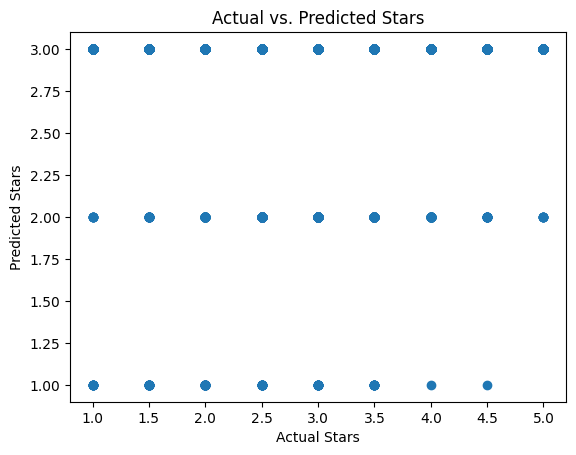

,name,stars,prediction
0,"Abby Rappoport, LAC, CMQ",5.0,3.0
1,The UPS Store,3.0,3.0
2,Target,3.5,3.0
3,St Honore Pastries,4.0,3.0
4,Perkiomen Valley Brewery,4.5,3.0
...,...,...,...
150338,INSPcenter/Thai Clinical Massage,4.0,3.0
150339,The Plum Pit,4.5,3.0
150340,West Side Kebab House,4.5,3.0
150344,Cyclery & Fitness Center,4.0,3.0


In [39]:
#ploting for a graph

predictions = model.transform(clean_business_df)

safe_predictions = predictions.select("business_id", "stars", "prediction")

named_predictions = safe_predictions.join(
    business_df.select("business_id", "name"),
    on="business_id",
    how="inner"
)

import matplotlib.pyplot as plt

new_plot = named_predictions.select("name", "stars", "prediction").toPandas()

plt.scatter(new_plot["stars"], new_plot["prediction"])
plt.xlabel("Actual Stars")
plt.ylabel("Predicted Stars")
plt.title("Actual vs. Predicted Stars")
plt.show()

new_plot.drop_duplicates(subset=["name", "stars", "prediction"])

In [40]:
#shows which predictions were right
right_predictions = new_plot[new_plot["stars"] == new_plot["prediction"]]
right_predictions.head(10)

,name,stars,prediction
1,The UPS Store,3.0,3.0
8,Tsevi's Pub And Grill,3.0,3.0
26,H&M,3.0,3.0
31,DeSandro on Main,3.0,3.0
34,River 127,3.0,3.0
41,Tony's Restaurant & 3rd Street Cafe,3.0,3.0
45,China Dragon Restaurant,3.0,3.0
50,Gold's Gym,3.0,3.0
54,Charlie's Market,3.0,3.0
55,Fairfield Inn & Suites,3.0,3.0


In [41]:
#shows which predictions were wrong
wrong_predictions = new_plot[new_plot["stars"] != new_plot["prediction"]]
wrong_predictions.head(10)


,name,stars,prediction
0,"Abby Rappoport, LAC, CMQ",5.0,3.0
2,Target,3.5,3.0
3,St Honore Pastries,4.0,3.0
4,Perkiomen Valley Brewery,4.5,3.0
5,Sonic Drive-In,2.0,3.0
6,Famous Footwear,2.5,3.0
7,Temple Beth-El,3.5,3.0
9,Sonic Drive-In,1.5,3.0
10,Marshalls,3.5,3.0
11,Vietnamese Food Truck,4.0,3.0


In [49]:
import pandas as pd

feataure_names = ["WiFi", "BusinessParking", "Alcohol", "NoiseLevel", "RestaurantsPriceRange2"]

tree_model = model.stages[-1]

impt = tree_model.featureImportances.toArray()

for feature, importance in zip(feature_names, impt):
    print(f"{feature}: {importance * 100:.2f}%")

analysis_df = clean_business_df.select(
    "stars", "WiFi", "BusinessParking", "Alcohol", "NoiseLevel", "RestaurantsPriceRange2"
).toPandas()

print(analysis_df.groupby("WiFi")["stars"].mean().sort_values(ascending=False))
print(analysis_df.groupby("BusinessParking")["stars"].mean().sort_values(ascending=False))
print(analysis_df.groupby("Alcohol")["stars"].mean().sort_values(ascending=False))
print(analysis_df.groupby("RestaurantsPriceRange2")["stars"].mean().sort_values(ascending=False))


WiFi: 3.79%
BusinessParking: 49.09%
Alcohol: 27.56%
NoiseLevel: 10.11%
RestaurantsPriceRange2: 9.46%
WiFi
u'free'    3.771523
u'no'      3.678865
u'paid'    3.631687
'no'       3.458169
None       3.440000
'paid'     3.368421
'free'     3.359580
Name: stars, dtype: float64
BusinessParking
{u'garage': False, u'street': True, u'validated': False, u'lot': True, u'valet': False}      4.500000
{u'garage': True, u'street': False, u'validated': False, u'lot': False, u'valet': True}      4.500000
{u'valet': False, u'garage': False, u'street': True, u'lot': False, u'validated': True}      4.500000
{u'valet': False, u'garage': False, u'street': False, u'lot': False, u'validated': False}    4.288889
{u'valet': False, u'garage': False, u'street': True, u'lot': False, u'validated': None}      4.266667
                                                                                               ...   
{u'valet': False, u'garage': None, u'street': False, u'lot': False, u'validated': False}     2.750